In [3]:
import pandas as pd
from utility import *

import matplotlib.pyplot as plt

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

from prophet import Prophet

import numpy as np
import seaborn as sns

### Read all Data

In [4]:
ticker_list = ['META','AAPL','AMZN','NFLX', 'GOOG', 'GOOGL']

#### Read data from csv and store it in dataframe with timestamp as index and sort index.

In [5]:
meta_all_df = pd.read_csv("../Datasets/daily_META.csv")
meta_all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
meta_all_df.set_index('timestamp', inplace=True)
meta_all_df.index = pd.to_datetime(meta_all_df.index)
meta_all_df.sort_index(inplace=True)
#display(meta_all_df)
display(meta_all_df.info())

aapl_all_df = pd.read_csv("../Datasets/daily_AAPL.csv")
aapl_all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
aapl_all_df.set_index('timestamp', inplace=True)
aapl_all_df.index = pd.to_datetime(aapl_all_df.index)
aapl_all_df.sort_index(inplace=True)
#display(aapl_all_df)
display(aapl_all_df.info())

amzn_all_df = pd.read_csv("../Datasets/daily_AMZN.csv")
amzn_all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
amzn_all_df.set_index('timestamp', inplace=True)
amzn_all_df.index = pd.to_datetime(amzn_all_df.index)
amzn_all_df.sort_index(inplace=True)
#display(amzn_all_df)
display(amzn_all_df.info())

nflx_all_df = pd.read_csv("../Datasets/daily_NFLX.csv")
nflx_all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
nflx_all_df.set_index('timestamp', inplace=True)
nflx_all_df.index = pd.to_datetime(nflx_all_df.index)
nflx_all_df.sort_index(inplace=True)
#display(nflx_all_df)
display(nflx_all_df.info())

goog_all_df = pd.read_csv("../Datasets/daily_GOOG.csv")
goog_all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
goog_all_df.set_index('timestamp', inplace=True)
goog_all_df.index = pd.to_datetime(goog_all_df.index)
goog_all_df.sort_index(inplace=True)
#display(goog_all_df)
display(goog_all_df.info())

googl_all_df = pd.read_csv("../Datasets/daily_GOOGL.csv")
googl_all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
googl_all_df.set_index('timestamp', inplace=True)
googl_all_df.index = pd.to_datetime(googl_all_df.index)
googl_all_df.sort_index(inplace=True)
#display(googl_all_df)
display(googl_all_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2012-05-18 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2923 non-null   float64
 1   high    2923 non-null   float64
 2   low     2923 non-null   float64
 3   close   2923 non-null   float64
 4   volume  2923 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 137.0 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6080 entries, 1999-11-01 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    6080 non-null   float64
 1   high    6080 non-null   float64
 2   low     6080 non-null   float64
 3   close   6080 non-null   float64
 4   volume  6080 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 285.0 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6080 entries, 1999-11-01 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    6080 non-null   float64
 1   high    6080 non-null   float64
 2   low     6080 non-null   float64
 3   close   6080 non-null   float64
 4   volume  6080 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 285.0 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5439 entries, 2002-05-23 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5439 non-null   float64
 1   high    5439 non-null   float64
 2   low     5439 non-null   float64
 3   close   5439 non-null   float64
 4   volume  5439 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 255.0 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2458 entries, 2014-03-27 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2458 non-null   float64
 1   high    2458 non-null   float64
 2   low     2458 non-null   float64
 3   close   2458 non-null   float64
 4   volume  2458 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 115.2 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4875 entries, 2004-08-19 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4875 non-null   float64
 1   high    4875 non-null   float64
 2   low     4875 non-null   float64
 3   close   4875 non-null   float64
 4   volume  4875 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 228.5 KB


None

After reviewing the individual data, we can see each stock has different volume of data so to make it consistent lets consider last 10 years, with google (goog) still lagging around 3 months of data but we will have all stocks with 10yrs data.

In [6]:
# function to filter data by date index
def filter_data_by_date(df, fromDt, toDt=None):
    '''
        Function to filter data from a dataframe with datetime as index

        Args: 
            df - Dataframe to filter
            fromtDt: starting date which can be any of datetime index format
            toDt: ending date which can be any of datetime index format
        
        Exception: 
            Will catch and display error if not able to filter data. 
            Most likely if index is not of type datetime, keyeror will 
            be raised
    '''
    try:
        if not toDt:
            return df.loc[fromDt].copy()
        return df.loc[fromDt:toDt].copy()
    except Exception as ex:
        print(f'Not able to filter data. {ex.__class__} - {ex}')

#### filter data from 2014 to 2023 to make it consistent

In [7]:
meta_df = filter_data_by_date(meta_all_df, '2014', '2023')

aapl_df = filter_data_by_date(aapl_all_df, '2014', '2023')

amzn_df = filter_data_by_date(amzn_all_df, '2014', '2023')

nflx_df = filter_data_by_date(nflx_all_df, '2014', '2023')

goog_df = filter_data_by_date(goog_all_df, '2014', '2023')

googl_df = filter_data_by_date(googl_all_df, '2014', '2023')

### Plot all data

Let us plot all stocks as timeseries charts, so we can seee how the prices have been trending.

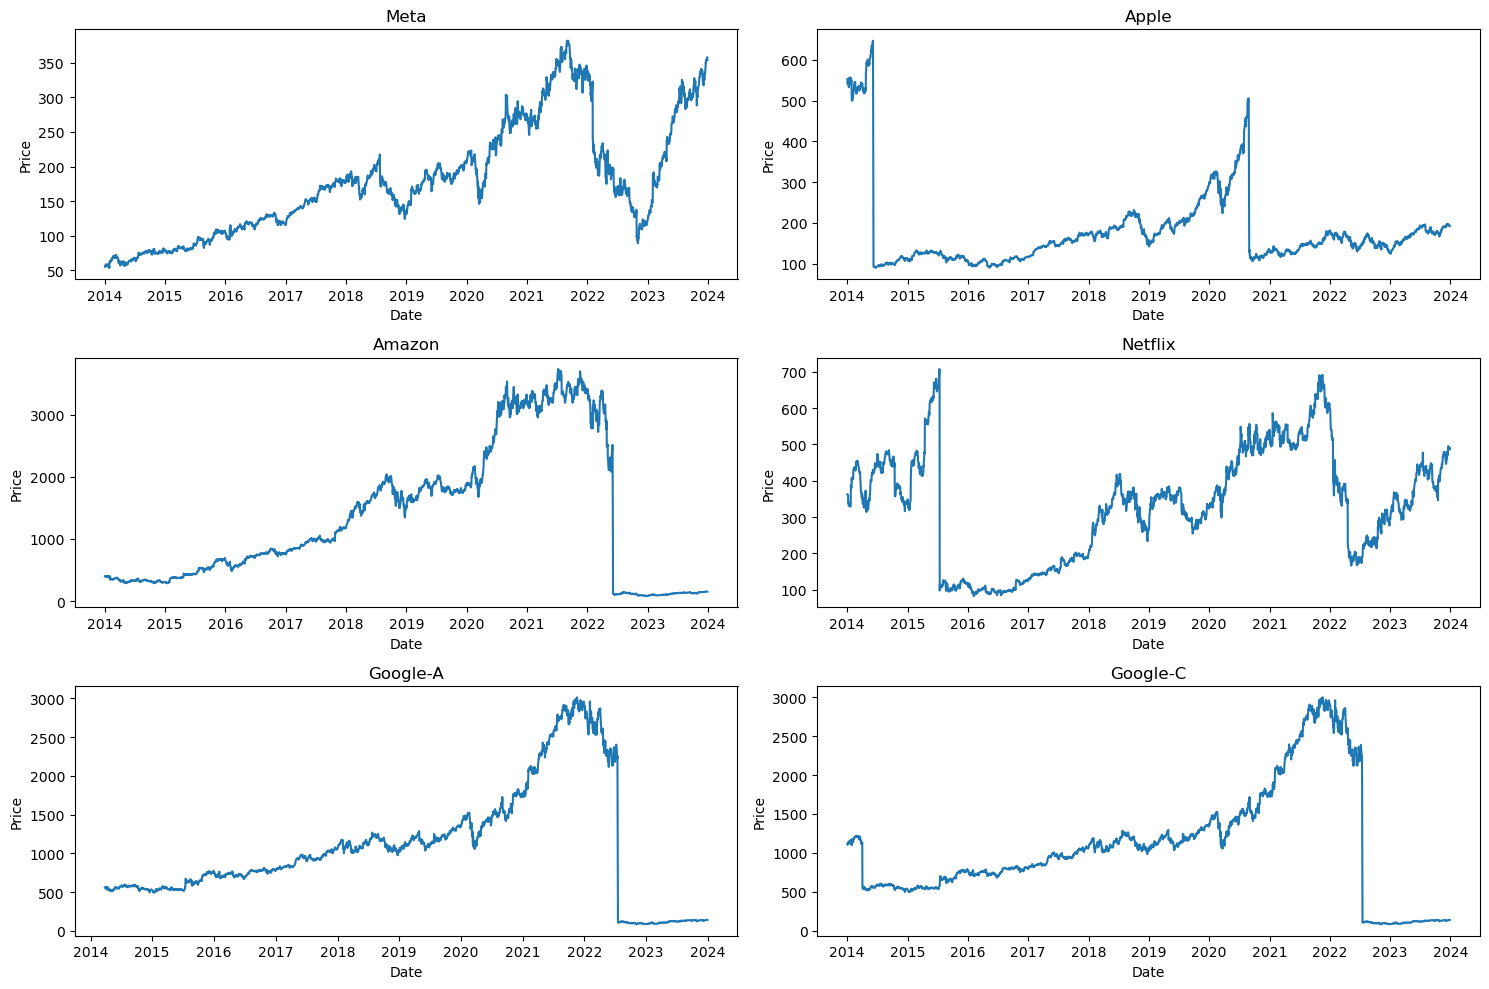

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

stocks = ['Meta', 'Apple', 'Amazon', 'Netflix', 'Google-A', 'Google-C']
data_frames = [meta_df, aapl_df, amzn_df, nflx_df, goog_df, googl_df]

for i, ax in enumerate(axes.flatten()):
    if i < len(stocks):
        ax.plot(data_frames[i][['close']] )
        ax.set_title(stocks[i])
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.grid(visible=False)
plt.tight_layout()
plt.show()

We can see that there are many sudden drops at prices, anything with straight line drop is the split. 
Companies split the stocks to reduce the price so many people can afford and buy more. In turn it increases volume and market cap. 

Below are the are the splits that caused those variations in above charts, 

Apple (aapl): 7-for-1 basis on June 9, 2014 and 4-for-1 basis on August 28, 2020.

Amazon (amzn): 20-for-1 basis on June 3, 2022

Netflix (nflx): 7-for-1 basis on July 14, 2015

Alphabet (goog and googl): 20-for-1 basis on July 18, 2022

And other major change you can see is during 2022 most of the market crashed due to interest rate increases, economy, recovering from pandemic and so many othe factors. We can see that in META and NFLX how prices were droping consistently during that time frame.

Lets plot the timeseries chart for 1.5 years between 07-2021 - 12-2022

In [9]:
meta_2021_2022_df = filter_data_by_date(meta_all_df, '2021-07', '2022-12')
aapl_2021_2022_df = filter_data_by_date(aapl_all_df, '2021-07', '2022-12')
amzn_2021_2022_df = filter_data_by_date(amzn_all_df, '2021-07', '2022-12')
nflx_2021_2022_df = filter_data_by_date(nflx_all_df, '2021-07', '2022-12')
goog_2021_2022_df = filter_data_by_date(goog_all_df, '2021-07', '2022-12')
googl_2021_2022_df = filter_data_by_date(googl_all_df, '2021-07', '2022-12')

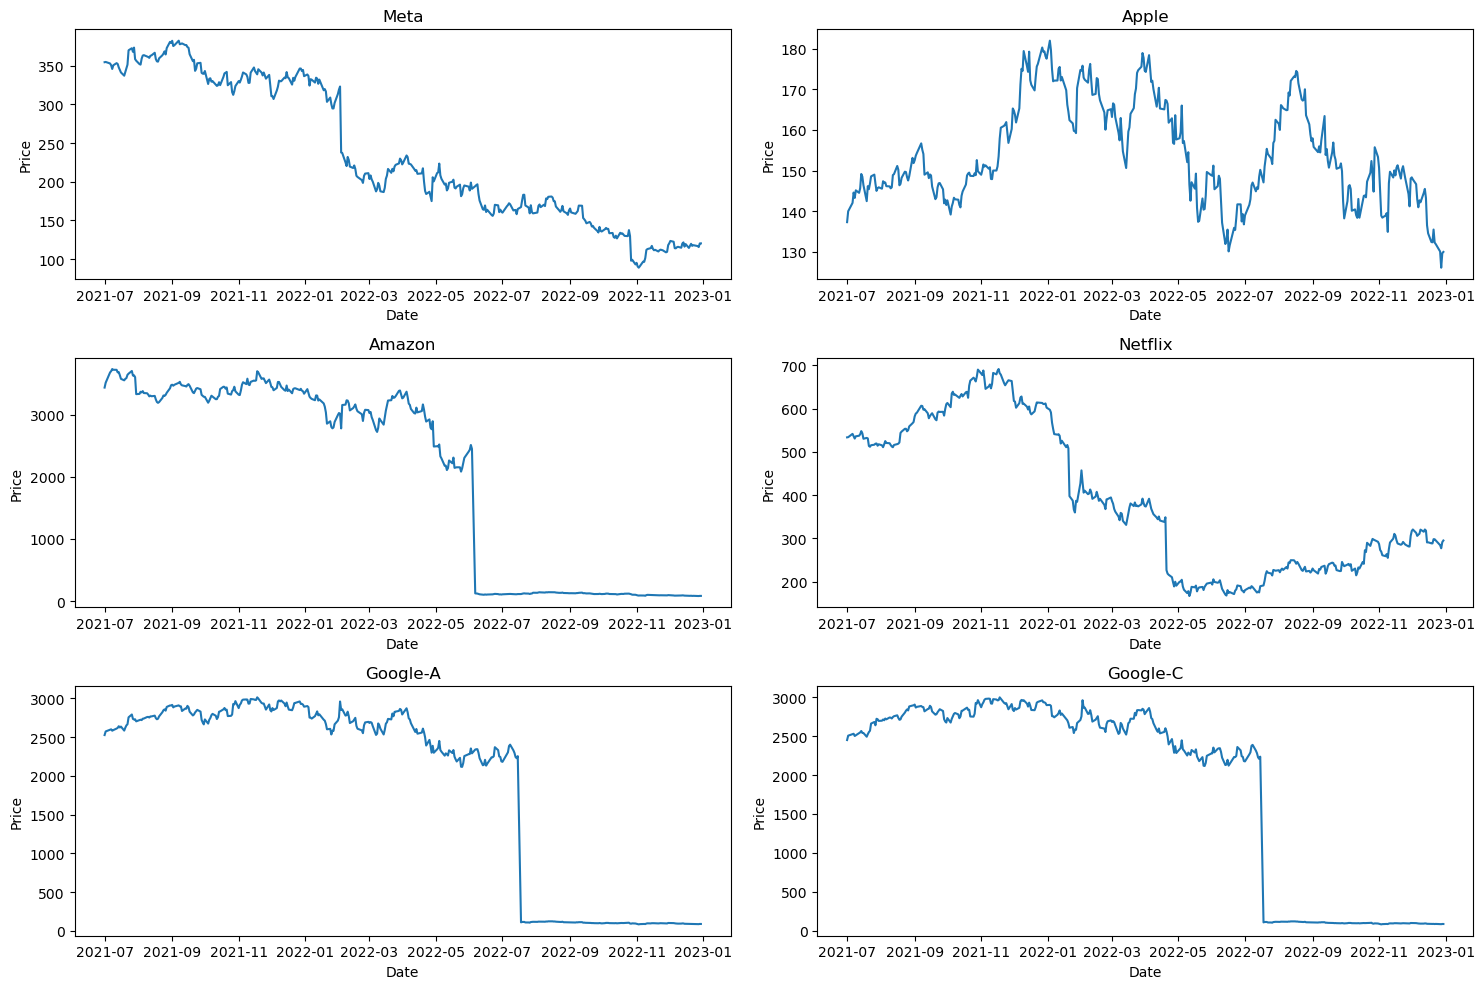

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

stocks = ['Meta', 'Apple', 'Amazon', 'Netflix', 'Google-A', 'Google-C']
data_frames = [meta_2021_2022_df, aapl_2021_2022_df, amzn_2021_2022_df, 
               nflx_2021_2022_df, goog_2021_2022_df, googl_2021_2022_df]

for i, ax in enumerate(axes.flatten()):
    if i < len(stocks):
        ax.plot(data_frames[i][['close']] )
        ax.set_title(stocks[i])
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.grid(visible=False)
plt.tight_layout()
plt.show()

From the above charts we can see Meta and Nflx had very huge consistent drop for over a period of time.

Lets review META and NFLX percentage change per month to get an idea of how much it was dropping by month. 
We can do just for 2022 and see how they performed monthly. 

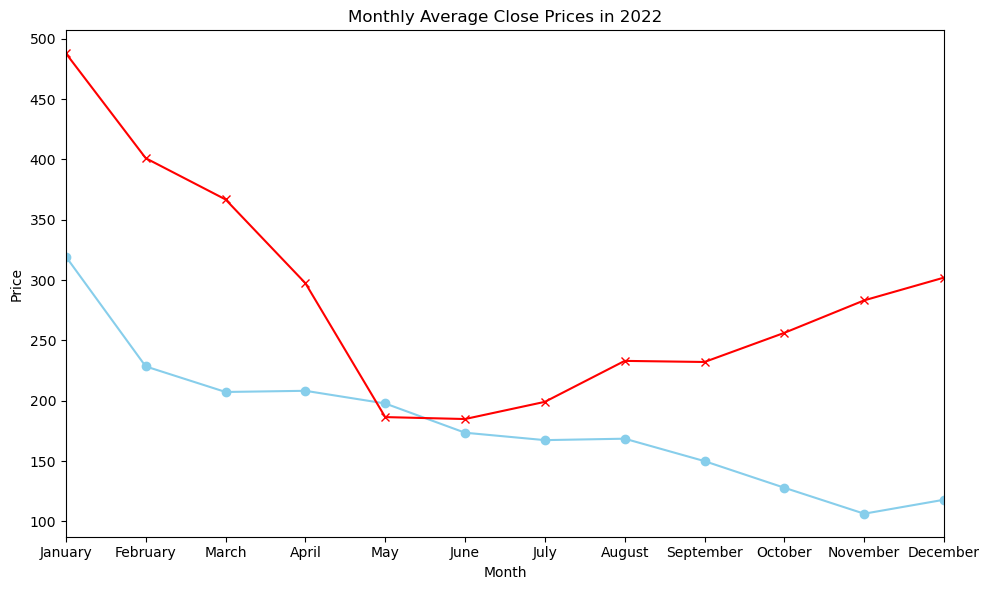

In [11]:
meta_2022_df = filter_data_by_date(meta_all_df, '2022')
nflx_2022_df = filter_data_by_date(nflx_all_df, '2022')

meta_2022_monthly_avg = meta_2022_df['close'].resample('M').mean()
nflx_2022_monthly_avg = nflx_2022_df['close'].resample('M').mean()

plt.figure(figsize=(10, 6))
meta_2022_monthly_avg.plot(marker='o', color='skyblue', linestyle='-')
nflx_2022_monthly_avg.plot(marker='x', color='red', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly Average Close Prices in 2022')
plt.xticks(meta_2022_monthly_avg.index, meta_2022_monthly_avg.index.strftime('%B'))
plt.grid(visible=False)
plt.tight_layout()
plt.show()

You can see that META dropped from around $319 to around $117, and NFLX around $480 to $190 and then finally ended year around $300. It was bad time for all stocks, so this is just an example of how bad the economy and pandemic impacted.

### Moving Average

Other analysis which helps to understand Stocks is moving average. Usually analysts use 50 day and 200 day moving average.
If the current prices is closer to moving average that means stock price is not too volatile and is consistent. 
There is alway an unexpected scenarios which can change so rapidly, hence stocks are always a risk. But moving average helps to show you how the particular stock doing in normal market conditions. 

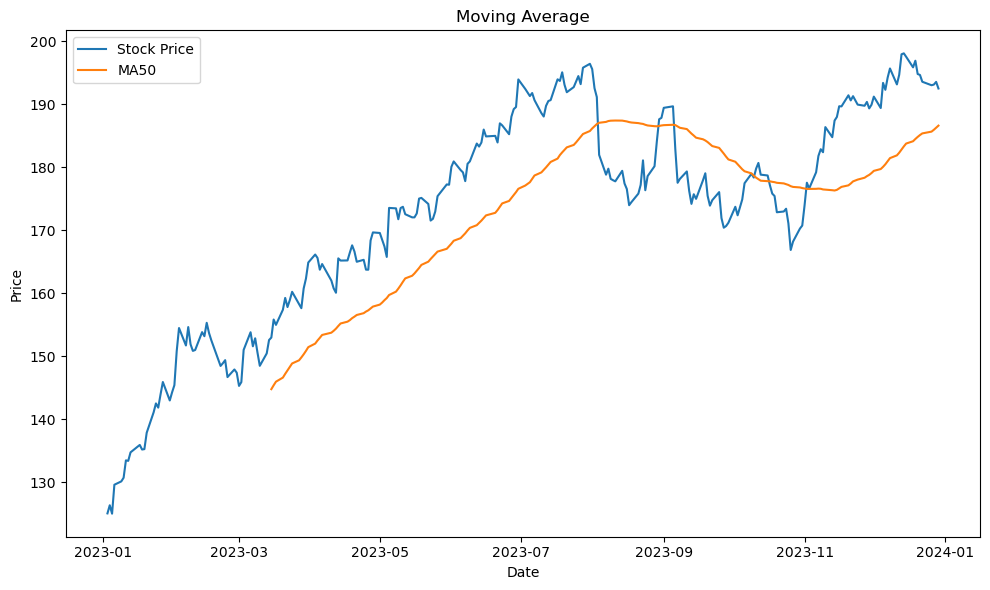

In [12]:
aapl_ma_df = aapl_all_df.loc['2023'].copy(['close'])

#calculate moving average for 50 and 200 days using rolling method
aapl_ma_df['MA50'] = aapl_ma_df['close'].rolling(window=50).mean()
aapl_ma_df['MA200'] = aapl_ma_df['close'].rolling(window=200).mean()

plt.figure(figsize=(10, 6))
plt.cla()
plt.plot(aapl_ma_df['close'], label='Stock Price')
plt.plot(aapl_ma_df['MA50'], label='MA50')
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(visible=False)
plt.tight_layout()
plt.show()

Calculate moving average for all stocks so we can plot them

In [13]:
meta_ma_df = filter_data_by_date(meta_all_df, '2023')
meta_ma_df['MA50'] = meta_ma_df['close'].rolling(window=50).mean()
meta_ma_df['MA200'] = meta_ma_df['close'].rolling(window=200).mean()

aapl_ma_df = filter_data_by_date(aapl_all_df, '2023')
aapl_ma_df['MA50'] = aapl_ma_df['close'].rolling(window=50).mean()
aapl_ma_df['MA200'] = aapl_ma_df['close'].rolling(window=200).mean()

amzn_ma_df = filter_data_by_date(amzn_all_df, '2023')
amzn_ma_df['MA50'] = amzn_ma_df['close'].rolling(window=50).mean()
amzn_ma_df['MA200'] = amzn_ma_df['close'].rolling(window=200).mean()

nflx_ma_df = filter_data_by_date(nflx_all_df, '2023')
nflx_ma_df['MA50'] = nflx_ma_df['close'].rolling(window=50).mean()
nflx_ma_df['MA200'] = nflx_ma_df['close'].rolling(window=200).mean()

goog_ma_df = filter_data_by_date(goog_all_df, '2023')
goog_ma_df['MA50'] = goog_ma_df['close'].rolling(window=50).mean()
goog_ma_df['MA200'] = goog_ma_df['close'].rolling(window=200).mean()

googl_ma_df = filter_data_by_date(googl_all_df, '2023')
googl_ma_df['MA50'] = googl_ma_df['close'].rolling(window=50).mean()
googl_ma_df['MA200'] = googl_ma_df['close'].rolling(window=200).mean()

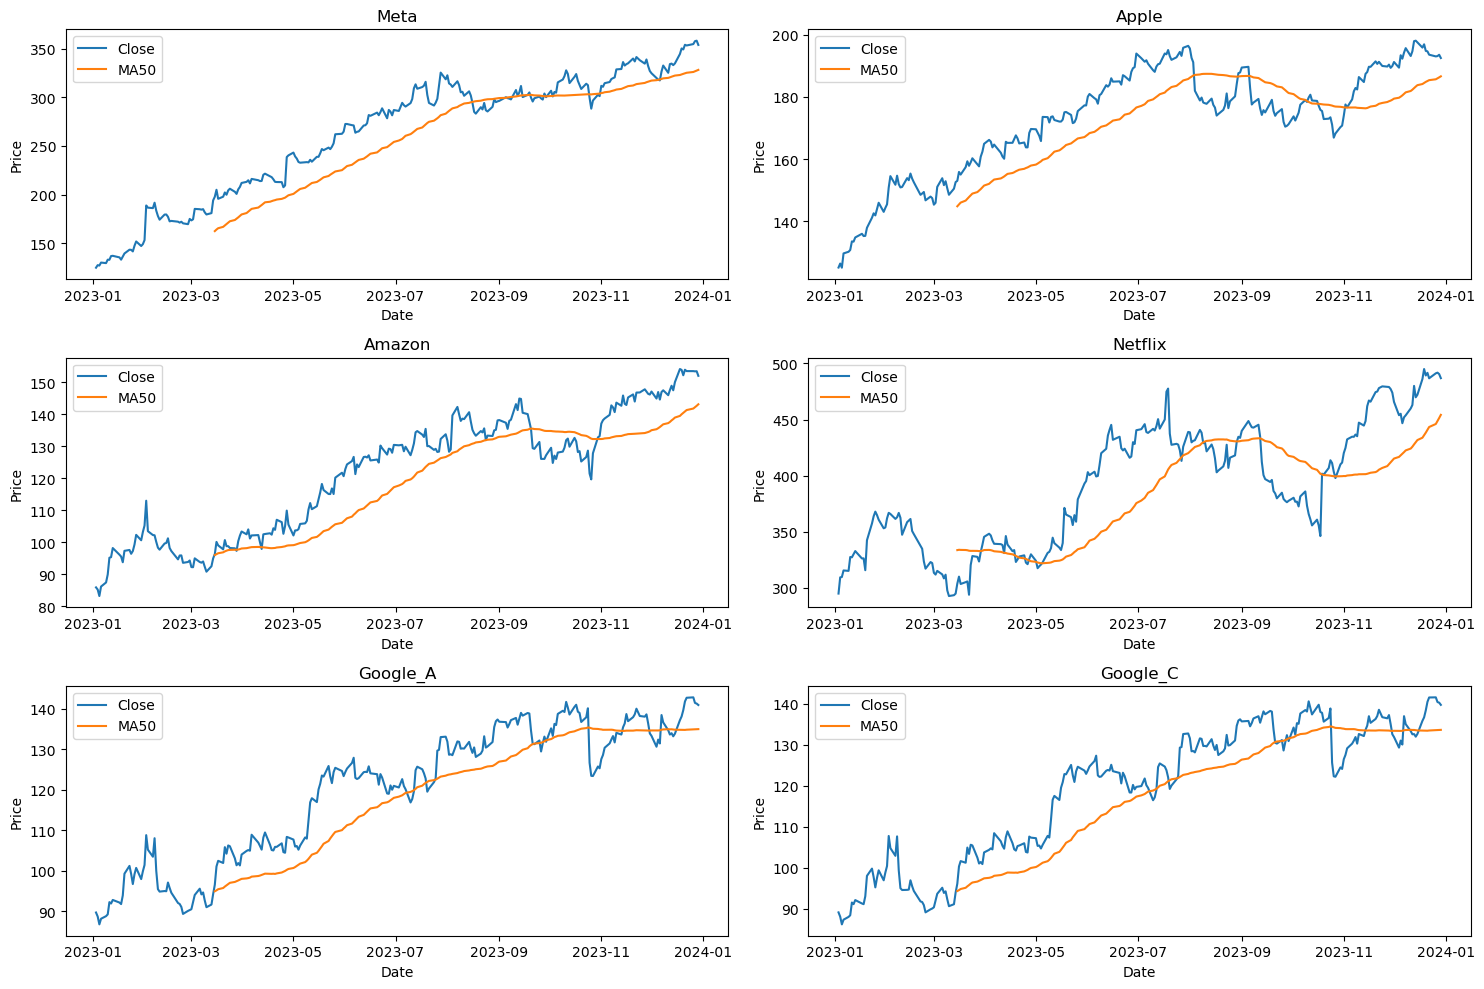

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

stocks = ['Meta', 'Apple', 'Amazon', 'Netflix', 'Google_A', 'Google_C']
data_frames = [meta_ma_df, aapl_ma_df, amzn_ma_df, nflx_ma_df, goog_ma_df, googl_ma_df]

for i, ax in enumerate(axes.flatten()):
    if i < len(stocks):
        ax.plot(data_frames[i][['close']], label='Close')
        ax.plot(data_frames[i][['MA50']], label='MA50' )
        ax.set_title(stocks[i])
        ax.grid(visible=False)
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()
plt.tight_layout()
plt.show()

### Statistical Analysis. 

Lets concat all closing prices to one dataframe so that we can use for analysis

In [15]:
all_stocks_df = pd.concat([meta_df['close'], aapl_df['close'], amzn_df['close'], nflx_df['close'], 
                    goog_df['close'], googl_df['close']], axis='columns', 
                   keys=['Meta', 'Apple', 'Amazon', 'Netflix', 'Google_A', 'Google_C'])

all_stocks_df.sort_index(inplace=True)
all_stocks_df.dropna(inplace=True)
all_stocks_df


,Meta,Apple,Amazon,Netflix,Google_A,Google_C
timestamp,,,,,,
2014-03-27,60.97,537.46,338.470,364.18,558.46,1114.28
2014-03-28,60.01,536.86,338.290,358.87,559.99,1120.15
2014-03-31,60.24,536.74,336.365,352.03,556.97,1114.51
2014-04-01,62.62,541.65,342.990,364.69,567.16,1134.89
2014-04-02,62.72,542.55,341.960,362.88,567.00,1135.10
...,...,...,...,...,...,...
2023-12-22,353.39,193.60,153.420,486.76,142.72,141.49
2023-12-26,354.83,193.05,153.410,491.19,142.82,141.52
2023-12-27,357.83,193.15,153.340,491.79,141.44,140.37


Lets calculate Mean, Median and Standard Deviation between these stocks. Our data is 10 yrs period. 

1. Mean determines the average price over specified timeframe.

2. Median is the center/middle value of the closing price.

3. Standard Deviation tells the variation from mean. the more distance the more volatile the stocks are. 

In [16]:
mean_prices = all_stocks_df.mean()

display("Mean Prices")
display(mean_prices)

median_prices = all_stocks_df.median()

display('Median Prices')
display(median_prices)

std_deviation = all_stocks_df.std()

display("Standard Deviattion")
display(std_deviation)

'Mean Prices'

Meta         180.833242
Apple        171.351525
Amazon      1358.513013
Netflix      330.831885
Google_A    1075.809629
Google_C    1081.092677
dtype: float64

'Median Prices'

Meta        171.585
Apple       151.795
Amazon      975.915
Netflix     341.245
Google_A    951.975
Google_C    974.470
dtype: float64

'Standard Deviattion'

Meta          80.158829
Apple         84.460942
Amazon      1110.402339
Netflix      152.621457
Google_A     750.023124
Google_C     741.228045
dtype: float64

### Statistical Data Visually

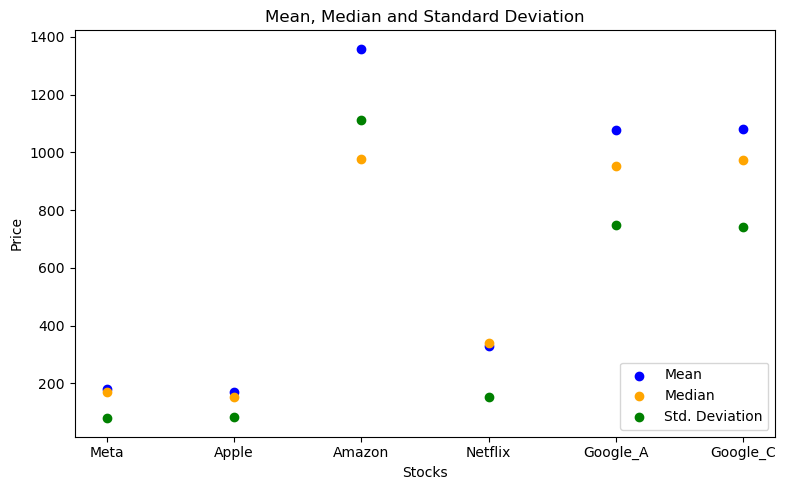

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(mean_prices.index, mean_prices.values, color='blue', label='Mean')
plt.scatter(median_prices.index, median_prices.values, color='orange', label='Median')
plt.scatter(std_deviation.index, std_deviation.values, color='green', label='Std. Deviation')
plt.xlabel('Stocks')
plt.ylabel('Price')
plt.title('Mean, Median and Standard Deviation')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### Correlation

Even though all our stocks are tech companies, they vary a lot. Correlation helps to understand how are each stock influence other or if there is any relation at all. 

In [18]:
corr_data = all_stocks_df.corr()
corr_data

,Meta,Apple,Amazon,Netflix,Google_A,Google_C
Meta,1.000000,0.083234,0.645310,0.536765,0.567968,0.558016
Apple,0.083234,1.000000,0.145180,0.184539,0.041869,0.047135
Amazon,0.645310,0.145180,1.000000,0.490007,0.896459,0.893846
Netflix,0.536765,0.184539,0.490007,1.000000,0.387096,0.379524
Google_A,0.567968,0.041869,0.896459,0.387096,1.000000,0.999253
Google_C,0.558016,0.047135,0.893846,0.379524,0.999253,1.000000


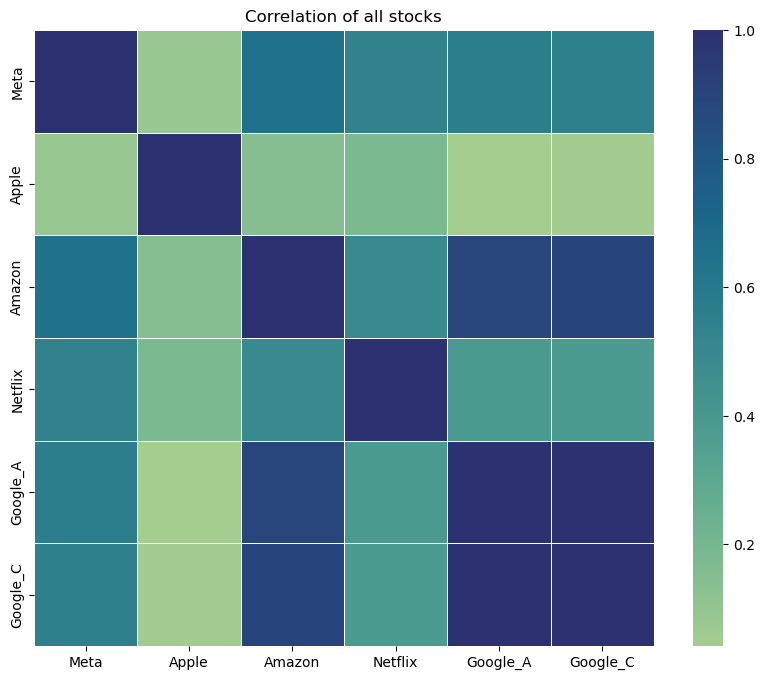

In [51]:
# Visualizing Correlation
plt.figure(figsize=(10,8))
ax = sns.heatmap(corr_data, annot=False, linewidth=.5, fmt='.3f', cmap='crest')
ax.set(xlabel="", ylabel="")
ax.set_title('Correlation of all stocks')
ax.xaxis.tick_bottom()
plt.show()

Observations:

Since all are of tech companies they don’t have any -ve correlation. 

Most of them have very good positive correlation. Except for Aapl which has least correlation with others. 

Meta has consistent correlation with all other stocks. 

Amazon has a very high correlation with Google stocks. 

### Candlestick Chart

It is best way to visualize Open, Close, High, Low prices of a stock. Which helps to understand how it performed on particular day/period. 

Lets take one stock and visualize and understand the chart. 

In [20]:
# filter aapl stock just for 1 months so we can see candlestick chart more 
# enhanced visually
aapl_c_df = filter_data_by_date(aapl_all_df, '2023-12')
aapl_c_df.drop('volume', axis=1, inplace=True)
aapl_c_df.reset_index(inplace=True)

# Convert the 'Date' column to Matplotlib's date format
aapl_c_df['timestamp'] = pd.to_datetime(aapl_c_df['timestamp'])
aapl_c_df['timestamp'] = aapl_c_df['timestamp'].apply(mdates.date2num)

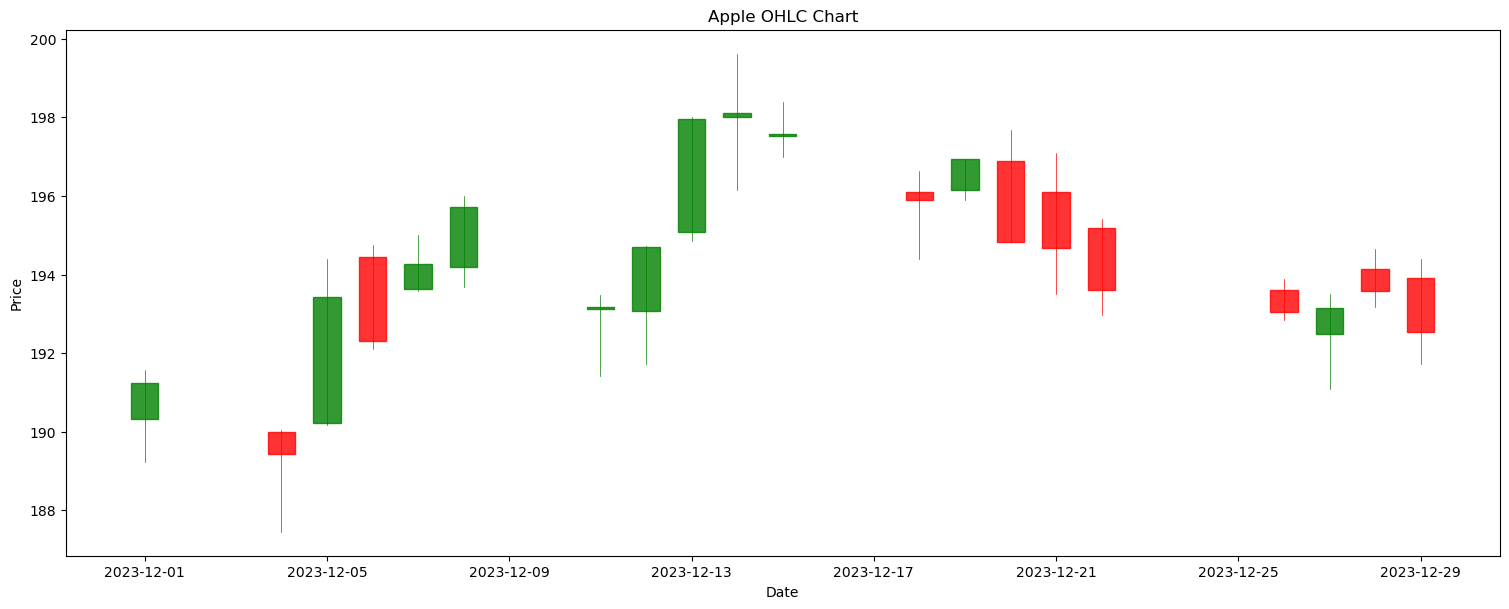

In [21]:
# Plotting candlestick chart
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 6))
candlestick_ohlc(ax, aapl_c_df.values, width=0.6, colorup='g', colordown='r', alpha=0.8)
ax.set_title('Apple OHLC Chart')
ax.xaxis_date()

fig.tight_layout()

plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Each item in the above chart which is called candlestick represents Opening, High, Low and Close price for that particular day. Hence name OHLC chart. 

Green color represents that the price closed more than open which is a gain and Red is viceversa which is a loss.
If it is gain, Open price is bottom of wide bar, and Close price is top of wide bar and if loss it is viceversa. 
Thin lines represents Higehst and Lowest price for that particular period.

### Earnings

Getting estimated and reported earnings per quarter.

In [22]:
meta_earnings_df = pd.read_csv("../Datasets/META_quarterly_earnings.csv")
meta_earnings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(meta_earnings_df)

aapl_earnings_df = pd.read_csv("../Datasets/AAPL_quarterly_earnings.csv")
aapl_earnings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(aapl_earnings_df)

amzn_earnings_df = pd.read_csv("../Datasets/AMZN_quarterly_earnings.csv")
amzn_earnings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(amzn_earnings_df)

nflx_earnings_df = pd.read_csv("../Datasets/NFLX_quarterly_earnings.csv")
nflx_earnings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(nflx_earnings_df)

goog_earnings_df = pd.read_csv("../Datasets/GOOG_quarterly_earnings.csv")
goog_earnings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(goog_earnings_df)

googl_earnings_df = pd.read_csv("../Datasets/GOOGL_quarterly_earnings.csv")
googl_earnings_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(googl_earnings_df)

Plotting AAPL earnings for 2022 and 2023 so that we can see how it performed. 

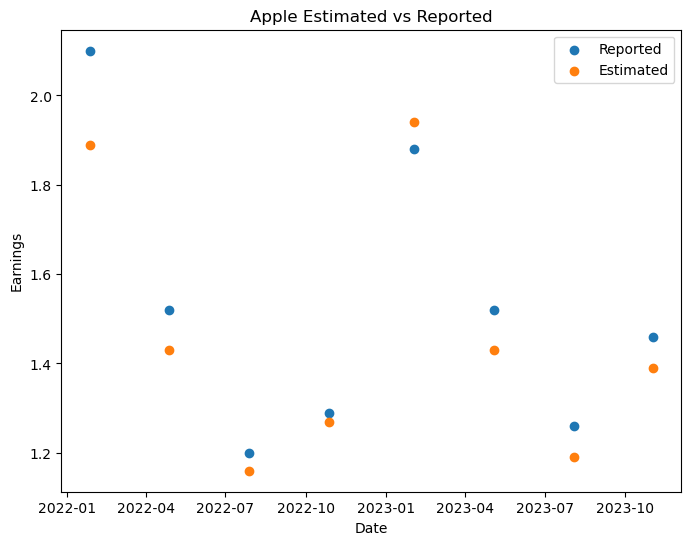

In [33]:
aapl_earnings_df['reportedDate'] = pd.to_datetime(aapl_earnings_df['reportedDate'])

x = aapl_earnings_df['reportedDate'].loc[aapl_earnings_df['reportedDate'].dt.year > 2021]
y1 = aapl_earnings_df['reportedEPS'].loc[aapl_earnings_df['reportedDate'].dt.year > 2021]
y2 = aapl_earnings_df['estimatedEPS'].loc[aapl_earnings_df['reportedDate'].dt.year > 2021]

# Creating the scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(x, y1, label='Reported')
plt.scatter(x, y2, label='Estimated')

plt.xlabel('Date')
plt.ylabel('Earnings')
plt.title('Apple Estimated vs Reported')
plt.legend()

plt.show()

Based on the plot we can see AAPL has done pretty in last couple years except for couple quarters. Last quarter in 2022 it just met the estimated EPS and performed below estimate in 2023 Q1.

Plot Earnings for all six stocks for 2023. And review how they performed against estimated EPS.

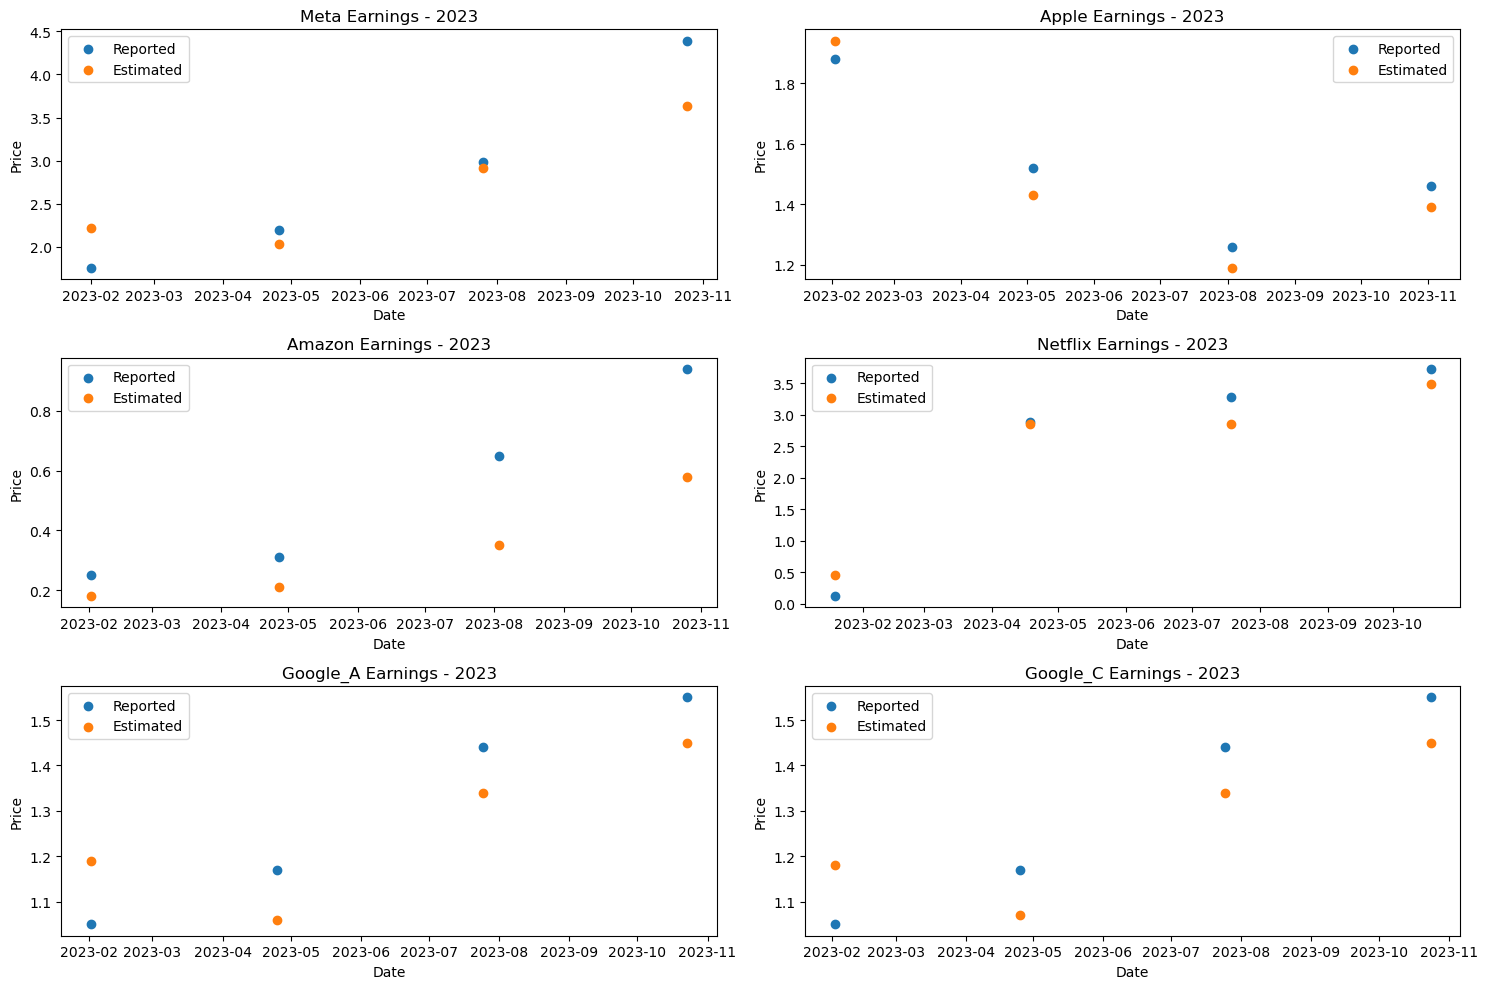

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

stocks = ['Meta', 'Apple', 'Amazon', 'Netflix', 'Google_A', 'Google_C']
data_frames = [meta_earnings_df, aapl_earnings_df, amzn_earnings_df, 
               nflx_earnings_df, goog_earnings_df, googl_earnings_df]

for i, ax in enumerate(axes.flatten()):
    data_frames[i]['reportedDate'] = pd.to_datetime(data_frames[i]['reportedDate'])

    x = data_frames[i]['reportedDate'].loc[data_frames[i]['reportedDate'].dt.year > 2022]
    y1 = data_frames[i]['reportedEPS'].loc[data_frames[i]['reportedDate'].dt.year > 2022]
    y2 = data_frames[i]['estimatedEPS'].loc[data_frames[i]['reportedDate'].dt.year > 2022]

    if i < len(stocks):
        ax.scatter(x, y1, label='Reported')
        ax.scatter(x, y2, label='Estimated')
        ax.set_title(f'{stocks[i]} Earnings - 2023')
        ax.grid(visible=False)
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend(loc='best')
plt.tight_layout()
plt.show()

We can see that all stocks except for Amazon underperformed in Q1 of 2023. And Amazon due to the black friday and christmas sales had a good earnings. 

Read Company overview data; So that we can analyze Market Cap, Number of shares and any other details about the company.

In [24]:
meta_company_overview_df = pd.read_csv("../Datasets/overview_META.csv")
meta_company_overview_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(meta_company_overview_df)

aapl_company_overview_df = pd.read_csv("../Datasets/overview_AAPL.csv")
aapl_company_overview_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(aapl_company_overview_df)

amzn_company_overview_df = pd.read_csv("../Datasets/overview_AMZN.csv")
amzn_company_overview_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(amzn_company_overview_df)

nflx_company_overview_df = pd.read_csv("../Datasets/overview_NFLX.csv")
nflx_company_overview_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(nflx_company_overview_df)

goog_company_overview_df = pd.read_csv("../Datasets/overview_GOOG.csv")
goog_company_overview_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(goog_company_overview_df)

googl_company_overview_df = pd.read_csv("../Datasets/overview_GOOGL.csv")
googl_company_overview_df.drop(['Unnamed: 0'], axis=1, inplace=True)
#display(googl_company_overview_df)

Concat all the companies to one dataframe.

In [25]:
companies_overview_df = pd.concat([meta_company_overview_df, aapl_company_overview_df, amzn_company_overview_df,
                                   nflx_company_overview_df, goog_company_overview_df, googl_company_overview_df],
                                   axis=0)
companies_overview_df.reset_index(inplace=True, drop=True)
companies_overview_df

,Symbol,AssetType,Name,Description,CIK,Exchange,Currency,Country,Sector,Industry,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
0,META,Common Stock,Meta Platforms Inc.,"Meta Platforms, Inc. develops products that en...",1326801,NASDAQ,USD,USA,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",...,7.060,18.88,1.221,361.90,131.76,332.29,289.92,2219610000,NaN,NaN
1,AAPL,Common Stock,Apple Inc,Apple Inc. is an American multinational techno...,320193,NASDAQ,USD,USA,TECHNOLOGY,ELECTRONIC COMPUTERS,...,7.640,22.67,1.290,199.62,130.71,187.69,180.15,15552800000,2023-11-16,2023-11-10
2,AMZN,Common Stock,Amazon.com Inc,"Amazon.com, Inc. is an American multinational ...",1018724,NASDAQ,USD,USA,TRADE & SERVICES,RETAIL-CATALOG & MAIL-ORDER HOUSES,...,2.955,22.24,1.163,155.63,88.12,145.19,128.94,10334000000,NaN,NaN
3,NFLX,Common Stock,Netflix Inc,"Netflix, Inc. is an American over-the-top cont...",1065280,NASDAQ,USD,USA,TRADE & SERVICES,SERVICES-VIDEO TAPE RENTAL,...,6.680,10.65,1.283,500.89,285.33,460.94,408.66,437680000,NaN,NaN
4,GOOG,Common Stock,Alphabet Inc Class C,Alphabet Inc. is an American multinational con...,1652044,NASDAQ,USD,USA,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",...,5.580,17.74,1.054,143.94,88.86,135.28,126.68,5725000000,NaN,NaN
5,GOOGL,Common Stock,Alphabet Inc Class A,Alphabet Inc. is an American multinational con...,1652044,NASDAQ,USD,USA,TECHNOLOGY,"SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...",...,5.580,17.74,1.054,142.68,88.58,133.87,125.80,5918000000,NaN,NaN


Convert Market Cap to Billions 
And Shares to Millions and Billions

In [26]:
companies_overview_df['MarketCap_Millions'] = companies_overview_df['MarketCapitalization'] / 1_000_000

companies_overview_df['MarketCap_Billions'] = companies_overview_df['MarketCapitalization'] / 1_000_000_000

companies_overview_df['SharesOutstanding_Millions'] = companies_overview_df['SharesOutstanding'] / 1_000_000

companies_overview_df['SharesOutstanding_Billions'] = companies_overview_df['SharesOutstanding'] / 1_000_000_000

companies_overview_df[['Symbol', 'MarketCap_Billions', 'MarketCap_Millions', 'SharesOutstanding_Millions', 'SharesOutstanding_Billions']]

,Symbol,MarketCap_Billions,MarketCap_Millions,SharesOutstanding_Millions,SharesOutstanding_Billions
0,META,921.706037,921706.037,2219.61,2.21961
1,AAPL,2879.445271,2879445.271,15552.80,15.55280
2,AMZN,1564.257550,1564257.550,10334.00,10.33400
3,NFLX,212.287930,212287.930,437.68,0.43768
4,GOOG,1747.392135,1747392.135,5725.00,5.72500
5,GOOGL,1773.404684,1773404.684,5918.00,5.91800


Plot the market cap as pie chart so that we can see how the company values are distributed in overall. Market cap is product of number of outstanding shares and current closing price. 

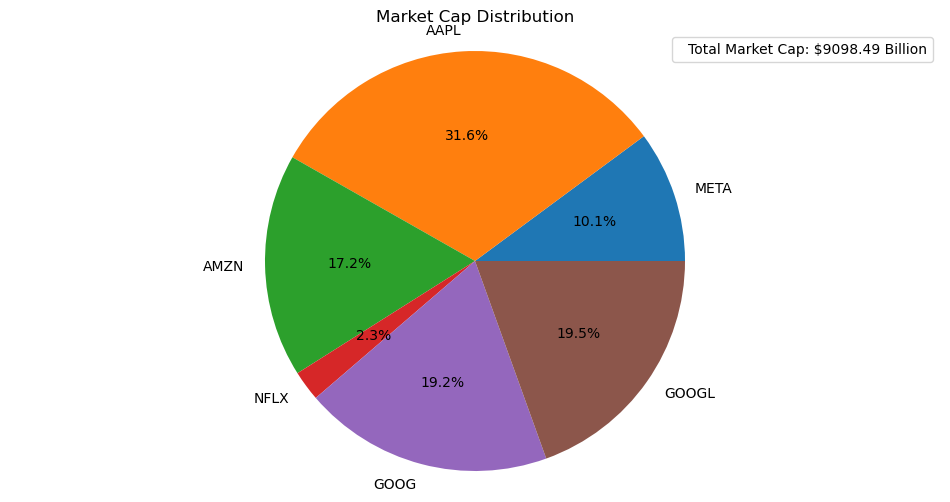

In [27]:
labels = companies_overview_df['Symbol']
sizes = companies_overview_df['MarketCap_Billions']

# Explode wedges
explode_vals = ()
for i in labels:
    val = (0,)
    if i in ['AAPL', 'GOOG', 'GOOGL']: 
        val = (0.1,)
    explode_vals += val

# Create a pie chart
plt.figure(figsize=(12, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)#, explode=explode_vals)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.title('Market Cap Distribution')

total_market_cap = sum(companies_overview_df['MarketCap_Billions'])

# Show total martket cap of all companies for reference.
legend_text = f'Total Market Cap: ${total_market_cap:.2f} Billion'
plt.legend([legend_text], loc='upper right', handlelength=0)

plt.show()

Plot the market cap and outstanding shares for all companies.

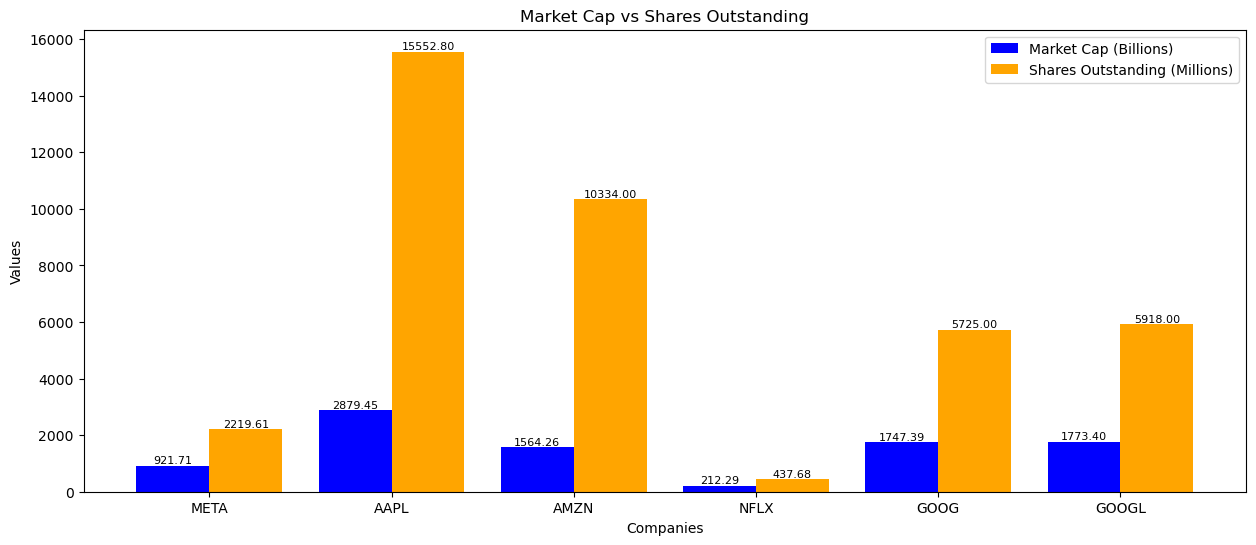

In [28]:
# Provided data
companies = companies_overview_df['Symbol']
market_cap = companies_overview_df['MarketCap_Billions']
shares_outstanding = companies_overview_df['SharesOutstanding_Millions']

# Set positions for the bars
bar_width = 0.4
index = np.arange(len(companies))

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting MarketCap_Billions
bars1 = ax.bar(index, market_cap, bar_width, label='Market Cap (Billions)', color='blue')

# Plotting SharesOutstanding_Millions
bars2 = ax.bar(index + bar_width, shares_outstanding, bar_width, label='Shares Outstanding (Millions)', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Companies')
ax.set_ylabel('Values')
ax.set_title('Market Cap vs Shares Outstanding')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(companies)
ax.legend()

ax.bar_label(bars1, fmt='%.2f', label_type='edge', fontsize=8)
ax.bar_label(bars2, fmt='%.2f', label_type='edge', fontsize=8)

# Display the chart
plt.show()
